# Set Variables

In [ ]:
dataset_file_names = {
    "Camel":      "Camel_TimeSeries - v.01",
    "CloudStack": "CloudStack_TimeSeries - v.01",
    "Geode":      "Geode_TimeSeries - v.01",
    "Hbase":      "Hbase_TimeSeries - v.03"
}

knn_accuracy_threshold = [
    0.5, 0.55, 
    0.6, 0.65, 
    0.7, 0.75, 
    0.8, 0.85, 
    0.9, 0.95
]

selected_th = 0.90

# Google Colab

In [ ]:
# load data from google drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
!ls "/content/gdrive/My Drive/"

Mounted at /content/gdrive
'Colab Notebooks'


In [ ]:
# project folder path
project_folder = "gdrive/MyDrive/Colab Notebooks/paper/"

# data folder path
data_folder = "00- My Data/two-phase method/"

# dataset folder path

# output folder path
output_folder = "01- Jupyter Notebook/80- two-phase method/00. Output/"

# Libs

In [ ]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Config

In [ ]:
mypaths = {}

for software_name, dataset_file_name_ts in dataset_file_names.items():
    mypaths[software_name] = project_folder + output_folder + software_name + "/" +  dataset_file_name_ts + "/class-predictabality-v01.csv"

preprocessing_params = {
    "dataset": {
        # time_stamp is the time that we change the class for a bug fixing.
        # id stands for identifier
        "columns_name":   ["bug_report_id", "class_id", "time_stamp", "label"],
        "columns_dtype" : {0: "int64", 1: "int64", 2: "int64", 3:"int32"}
    },
    "timeseries":{
        "columns_name":   ["class_id", "time_stamp", "label"],
        "columns_dtype" : {0: "int64", 1: "int64", 2:"int32"}
    },
    "class_predictabality": {
        "columns_name":   ["class_id"],
        "columns_dtype" : {0: "int64"}
    },
    
    # 0: no change / 1: increase bad smell / -1: decrease bad smell
    "class_labels": [0, 1, -1], 
    "num_classes": 3,
}

knn_model_params = {
    "train_size": 0.8,
    "n_neighbors": 5
}

progress_colours = ["webmaroon", "salmon", "orangered", "deeppink3", "crimson", 
                    "black", "blue", "gray", "cyan4", "darkgreen"]

In [ ]:
mypaths

{'Camel': 'gdrive/MyDrive/Colab Notebooks/paper/01- Jupyter Notebook/two-phased method/00. Output/Camel/Camel_TimeSeries - v.01/class-predictabality-v01.csv',
 'CloudStack': 'gdrive/MyDrive/Colab Notebooks/paper/01- Jupyter Notebook/two-phased method/00. Output/CloudStack/CloudStack_TimeSeries - v.01/class-predictabality-v01.csv',
 'Geode': 'gdrive/MyDrive/Colab Notebooks/paper/01- Jupyter Notebook/two-phased method/00. Output/Geode/Geode_TimeSeries - v.01/class-predictabality-v01.csv',
 'Hbase': 'gdrive/MyDrive/Colab Notebooks/paper/01- Jupyter Notebook/two-phased method/00. Output/Hbase/Hbase_TimeSeries - v.03/class-predictabality-v01.csv'}

# Read class-predictabality

In [ ]:
pred_col_name = []
pred_col_name.extend(preprocessing_params["class_predictabality"]["columns_name"])
pred_col_type = {}
pred_col_type.update(preprocessing_params["class_predictabality"]["columns_dtype"])
count = len(pred_col_type)
for th in knn_accuracy_threshold:
    temp1 = "predictions_" + str(th)
    pred_col_name.append(temp1)
    pred_col_type[count] = pd.Int32Dtype()
    count += 1

In [ ]:
pred_col_type

{0: 'int64',
 1: Int32Dtype(),
 2: Int32Dtype(),
 3: Int32Dtype(),
 4: Int32Dtype(),
 5: Int32Dtype(),
 6: Int32Dtype(),
 7: Int32Dtype(),
 8: Int32Dtype(),
 9: Int32Dtype(),
 10: Int32Dtype()}

In [ ]:
pred_col_name

['class_id',
 'predictions_0.5',
 'predictions_0.55',
 'predictions_0.6',
 'predictions_0.65',
 'predictions_0.7',
 'predictions_0.75',
 'predictions_0.8',
 'predictions_0.85',
 'predictions_0.9',
 'predictions_0.95']

In [ ]:
df_data_pred = {}

In [ ]:
for k, v in dataset_file_names.items():
    temp = {}
    for cn, cd in zip(pred_col_name, pred_col_type.values()):
            temp[cn] = pd.Series(dtype=cd)
    df_data_pred[k] = pd.DataFrame(temp)

    temp2 = pd.read_csv(
        mypaths[k], 
        dtype=pred_col_type, 
    )
    df_data_pred[k] = df_data_pred[k].append(temp2, ignore_index=True)

In [ ]:
# df_data_pred

# class predictability in each th

In [ ]:
per_class_predictable = {}

In [ ]:
for k, v in dataset_file_names.items():
    num_total = len(df_data_pred[k])
    temp = {}
    for th in knn_accuracy_threshold:
        
        new_column_name = "predictions_" + str(th)
        temp2 = num_total - df_data_pred[k][new_column_name].isna().sum()
        temp3 = round((temp2 / num_total) * 100)
        temp[th] = temp3

    #temp2 = num_total
    per_class_predictable[k] = temp
    #numNan = g.iloc[:, -1].isna().sum()

In [ ]:
per_class_predictable

{'Camel': {0.5: 27,
  0.55: 27,
  0.6: 27,
  0.65: 27,
  0.7: 26,
  0.75: 26,
  0.8: 25,
  0.85: 24,
  0.9: 22,
  0.95: 22},
 'CloudStack': {0.5: 75,
  0.55: 75,
  0.6: 75,
  0.65: 74,
  0.7: 74,
  0.75: 73,
  0.8: 67,
  0.85: 66,
  0.9: 63,
  0.95: 61},
 'Geode': {0.5: 46,
  0.55: 46,
  0.6: 45,
  0.65: 45,
  0.7: 44,
  0.75: 43,
  0.8: 42,
  0.85: 41,
  0.9: 39,
  0.95: 38},
 'Hbase': {0.5: 26,
  0.55: 26,
  0.6: 24,
  0.65: 23,
  0.7: 21,
  0.75: 19,
  0.8: 17,
  0.85: 16,
  0.9: 14,
  0.95: 11}}

# Plot

In [ ]:
my_x = []
my_y = []
for k, v in dataset_file_names.items():
    my_x.append(k)
    my_y.append(per_class_predictable[k][selected_th])

In [ ]:
print(my_x)
print(my_y)

['Camel', 'CloudStack', 'Geode', 'Hbase']
[22, 63, 39, 14]


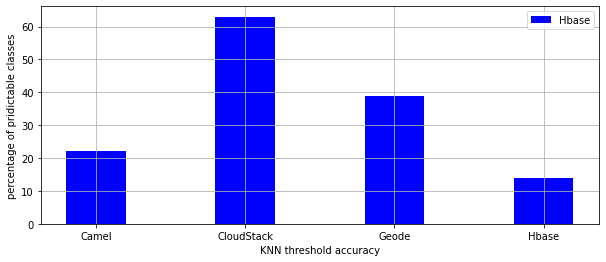

In [ ]:
# figsize=(a, b) : a_width, b_height
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

axes.bar(my_x, my_y, width=0.4, label=software_name, color="blue")

# axes.plot(knn_accuracy_threshold, per_class_predictable, label=software_name, color="blue", 
#             linestyle="solid", lw=1, marker=".")

# axes.set_title(software_name)
axes.set_xlabel("KNN threshold accuracy")
axes.set_ylabel("percentage of pridictable classes")

# axes.set_xlim([0.45, 1.05])
# axes.get_xaxis().set_ticks(knn_accuracy_threshold)

# axes.set_ylim([0, 110])
# axes.get_yaxis().set_ticks(list(range(0, 101, 10)))

axes.legend()
axes.grid(True)